In [14]:
import os
# )import matplotlib.pyplot as pl
import numpy as np
import sys
# sys.path.insert(0, "/mnt/c/Users/maxpu/Dropbox/scripts/Projects/socialsandbox/mastodon-sim/election/src/election_sim")
from viz import (
    parse_scores,
    parse_votes,
    calculate_polling_average
)
import matplotlib.pyplot as pl

In [10]:
import os
os.chdir('/mnt/c/Users/maxpu/Dropbox/scripts/Projects/socialsandbox/mastodon-sim/examples/election/SOLAR_workshop/')

In [22]:
pwd

'/mnt/c/Users/maxpu/Dropbox/scripts/Projects/socialsandbox/mastodon-sim/examples/election/SOLAR_workshop'

In [24]:
# names=[
#     "independent",
#     "voter_bias_schwartz",
#     "independent_malicious"
# ]
names=[
    "independent",
    "bias",
    "malicious"
]
trait_type='Big5'
survey='None'
data_outdir='output/'
file_rootnames = [ data_outdir+'simsset_'+survey+'_'+trait_type+'_'+name+'.json' for name in names]

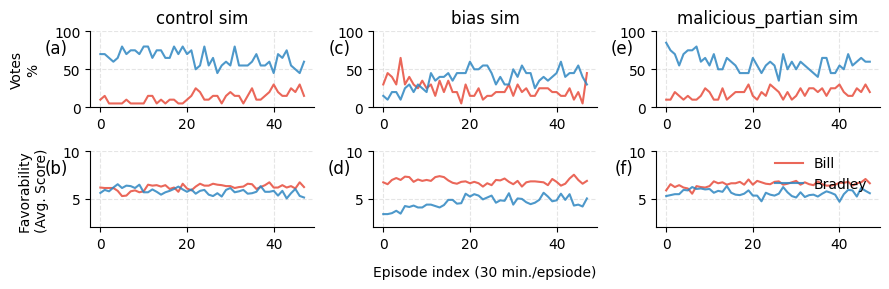

In [25]:
fig,ax=pl.subplots(2,3,figsize=(3*3,1.5*2))
output_path='SOLAR_workshop/'
fig_name='newcode'
sz=3
lw=1.5
mew=1
fs=10
titles=names
titles[0]='control'
titles[2]='malicious_partian'
labels=[['(a)','(c)','(e)'],['(b)','(d)','(f)']]
for sit,sim_type in enumerate(file_rootnames):
    for dit,data_type in enumerate(['votes_log','pol_log']):
        file_name = '../'+sim_type + data_type +'.txt'
        data=parse_votes(file_name) if data_type=='votes_log' else parse_scores(file_name)

        if dit==0:
            data = calculate_polling_average(data)

            # Plot Bill's polling average
            ax[dit,sit].plot(data["Episode"], data["Bill"], label="Bill", marker=None, markersize=sz,
                    linewidth=lw, color="#E74C3C", alpha=0.85, markerfacecolor="white", markeredgewidth=mew)

            # Plot Bradley's polling average
            ax[dit,sit].plot(data["Episode"], data["Bradley"], label="Bradley", marker=None, markersize=sz,
                    linewidth=lw, color="#2E86C1", alpha=0.85, markerfacecolor="white", markeredgewidth=mew)

            # Add titles and labels

            ax[dit,sit].set_title(titles[sit]+' sim')#, fontsize=18, fontweight='bold', pad=20, fontfamily='DejaVu Sans')
        #     ax[dit,sit].set_xlabel("Episode", fontsize=14, labelpad=10, fontfamily='DejaVu Sans')
            if sit==0:
                ax[dit,sit].set_ylabel("Votes\n%", fontsize=fs, labelpad=10)#, fontfamily='DejaVu Sans')

            # Customize the grid for a more subtle look
            ax[dit,sit].grid(True, linestyle='--', alpha=0.4, color='#bfbfbf')

            # Customize the ticks and tick labels
        #     ax[dit,sit].set_xticks(data["Episode"], fontsize=12, fontfamily='DejaVu Sans')
        #     ax[dit,sit].set_yticks(range(0, 101, 10), fontsize=12, fontfamily='DejaVu Sans')

            # Remove top and right borders for a cleaner look
            ax[dit,sit].spines['top'].set_visible(False)
            ax[dit,sit].spines['right'].set_visible(False)

            # Add legend
        #     ax[dit,sit].legend(loc="upper left", fontsize=12, frameon=False)
            ax[dit,sit].set_ylim(0,100)
            # # Final styling touch
            # ax[dit,sit].tight_layout()

            # # Show the plot
            # ax[dit,sit].show()
        else:
        # Filter data for Bill and Bradley
            bill_data = data[data["ScoredPerson"] == "Bill"].groupby("Episode")["Score"].mean()
            bradley_data = data[data["ScoredPerson"] == "Bradley"].groupby("Episode")["Score"].mean()

            # Create the plot
            # ax[dit,sit].figure(figsize=(12, 8))

            # Plot Bill's scores
            ax[dit,sit].plot(bill_data.index, bill_data.values, label="Bill", marker=None, markersize=sz,
                    linewidth=lw, color="#E74C3C", alpha=0.85, markerfacecolor="white", markeredgewidth=mew)

            # Plot Bradley's scores
            ax[dit,sit].plot(bradley_data.index, bradley_data.values, label="Bradley", marker=None, markersize=sz,
                    linewidth=lw, color="#2E86C1", alpha=0.85, markerfacecolor="white", markeredgewidth=mew)

            # Add titles and labels
        #     ax[dit,sit].set_title("Average Scores for Bill and Bradley Over Episodes", fontsize=18, fontweight='bold', pad=20, fontfamily='DejaVu Sans')
            if sit==1:
                ax[dit,sit].set_xlabel("Episode index (30 min./epsiode)", fontsize=fs, labelpad=10)#, fontfamily='DejaVu Sans')
            if sit==0:
                ax[dit,sit].set_ylabel("Favorability \n(Avg. Score)", fontsize=fs, labelpad=10)#, fontfamily='DejaVu Sans')

            # Customize the grid for a more subtle look
            ax[dit,sit].grid(True, linestyle='--', alpha=0.4, color='#bfbfbf')

            # Customize the ticks and tick labels
        #     ax[dit,sit].set_xticks(bill_data.index, fontsize=12, fontfamily='DejaVu Sans')
        #     ax[dit,sit].yticks(range(0, 11), fontsize=12, fontfamily='DejaVu Sans')

            # Remove top and right borders for a cleaner look
            ax[dit,sit].spines['top'].set_visible(False)
            ax[dit,sit].spines['right'].set_visible(False)
            ax[dit,sit].set_ylim(2,10)
            # Add legend
            if sit==2:
                ax[dit,sit].legend(loc="upper right", bbox_to_anchor=(1, 1.1), fontsize=10, frameon=False)
        ax[dit,sit].text(-0.1, 0.9, labels[dit][sit], transform=ax[dit,sit].transAxes,fontsize=12, va='top', ha='right')
# Final styling touch
fig.tight_layout()
fig.savefig(fig_name+'.pdf',transparent=None, dpi=300,format='pdf')

In [46]:
pwd

'/mnt/c/Users/maxpu/Dropbox/scripts/Projects/socialsandbox/mastodon-sim/notebooks'